In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# for converting currency to int
from decimal import Decimal
from re import sub

import requests
import json

# Google developer API key
from config import gkey

import gmaps
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [ ]:
#input_file = "data.csv"
input_file= os.path.join('Resources','data.csv')
data_df = pd.read_csv(input_file)

In [4]:
#total number of players
total_players=data_df['ID'].nunique()
total_players

18207

In [5]:
#Dropping columns that are not used in the analysis and also the ones with lot of null values
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()
new_df['Age'].min()

16

In [6]:
new_df['Age'].max()

45

In [65]:
new_df=new_df.dropna()
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age Range
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,31-35
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,31-35
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,26-30
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,26-30
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,26-30


In [9]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)

In [10]:
print(new_df['Wage'].head())

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int64


# Sandy

In [52]:
wage_df = new_df[['ID','Name','Wage']]
wage_df.dropna()
wage_df.head(10)
print(wage_df["Wage"].head())

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int64


In [53]:
# Sorting player wages in descending order
wage_df.sort_values(inplace=True,by='Wage', ascending=False)
wage_df.head(2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Name,Wage
0,158023,L. Messi,565000
7,176580,L. Suárez,455000


In [54]:
# Create top 10 wage earner df

wage_df.reset_index(drop=True, inplace=True)
top10_df = wage_df.loc[0:10] 
print(top10_df)

        ID               Name    Wage
0   158023           L. Messi  565000
1   176580          L. Suárez  455000
2   177003          L. Modrić  420000
3    20801  Cristiano Ronaldo  405000
4   155862       Sergio Ramos  380000
5   192985       K. De Bruyne  355000
6   173731            G. Bale  355000
7   182521           T. Kroos  355000
8   189242           Coutinho  340000
9   183277          E. Hazard  340000
10  197781               Isco  315000


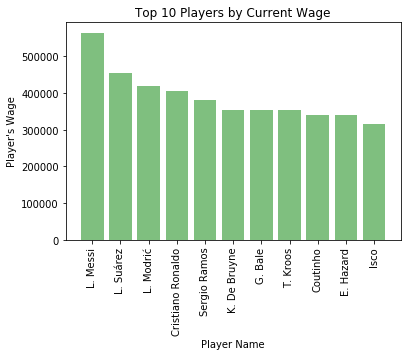

In [55]:
# Create bar chart for highest paid players
player_name=top10_df["Name"]
player_wage = top10_df["Wage"]

x_axis = np.arange(len(player_name))
plt.bar(x_axis,player_wage, color='g', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, player_name, rotation="vertical")

plt.title("Top 10 Players by Current Wage")
plt.xlabel("Player Name")
plt.ylabel("Player's Wage")
plt.savefig("PlayerWage.png")

# Ola

In [56]:
total_players_new=new_df['ID'].nunique()

In [57]:
# Analyze best Players based on rankings
top_rated_player = pd.DataFrame(new_df.groupby(["Name", "Nationality"])["Overall"].max().sort_values(ascending=False))
top_rated_player.head(10)

,,Overall
Name,Nationality,
Cristiano Ronaldo,Portugal,94
L. Messi,Argentina,94
Neymar Jr,Brazil,92
L. Suárez,Uruguay,91
K. De Bruyne,Belgium,91
Sergio Ramos,Spain,91
De Gea,Spain,91
E. Hazard,Belgium,91
L. Modrić,Croatia,91


In [58]:
#reset the index
temp=top_rated_player.reset_index().head(10)
temp

,Name,Nationality,Overall
0,Cristiano Ronaldo,Portugal,94
1,L. Messi,Argentina,94
2,Neymar Jr,Brazil,92
3,L. Suárez,Uruguay,91
4,K. De Bruyne,Belgium,91
5,Sergio Ramos,Spain,91
6,De Gea,Spain,91
7,E. Hazard,Belgium,91
8,L. Modrić,Croatia,91
9,David Silva,Spain,90


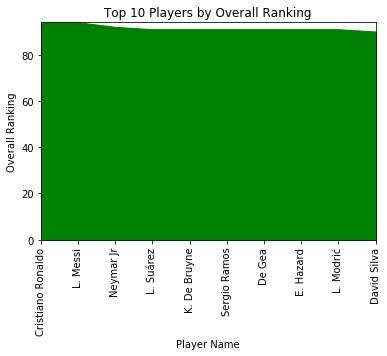

<Figure size 432x288 with 0 Axes>

In [59]:
#temp_area = temp.plot.area("Nationality")
player_name=temp["Name"]
player_overall = temp["Overall"]
x_axis = np.arange(len(player_name))

fig = plt.figure()
temp_area = fig.add_subplot(111)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, player_name, rotation="vertical")
temp_area.stackplot(player_name, player_overall, color = 'g')
temp_area.set_title("Top 10 Players by Overall Ranking")
temp_area.set_xlabel("Player Name")
temp_area.set_ylabel("Overall Ranking")
# Set margins to avoid "whitespace"
temp_area.margins(0, 0) 
plt.show()
plt.savefig("PlayerRatings.png")

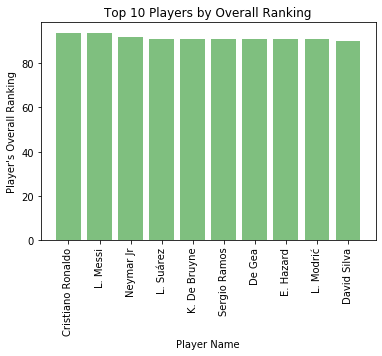

In [60]:
# Create bar chart for highest rated players
player_name=temp["Name"]
player_overall = temp["Overall"]
x_axis = np.arange(len(player_name))
plt.bar(x_axis,player_overall, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, player_name, rotation="vertical")
plt.title("Top 10 Players by Overall Ranking")
plt.xlabel("Player Name")
plt.ylabel("Player's Overall Ranking")
plt.savefig("PlayerRanking.png")

In [61]:
#Find total count of players from every nationality
player_nationality = new_df.sort_values(by='Nationality').Nationality.value_counts()
player_nationality.head(20)

England                1657
Germany                1195
Spain                  1071
Argentina               935
France                  911
Brazil                  825
Italy                   699
Colombia                616
Japan                   478
Netherlands             452
Sweden                  394
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  347
Norway                  341
Saudi Arabia            337
Denmark                 335
Name: Nationality, dtype: int64

In [62]:
#create new dataframe for top 20 countries with highest count of players
new_player_nationality = pd.DataFrame({
                        "Nationality": ["England", "Germany","Spain","Argentina","France","Brazil","Italy","Colombia","Japan","Netherlands","Sweden","China PR ","Chile","Republic of Ireland","Mexico","United States","Poland","Norway","Saudi Arabia","Denmark"],
                        "Player Count":["1662","1198","1072","937","914","827","702","618","478","453","397","392","391","368","366","353","350","341","340","336"]})
new_player_nationality

,Nationality,Player Count
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
5,Brazil,827
6,Italy,702
7,Colombia,618
8,Japan,478
9,Netherlands,453


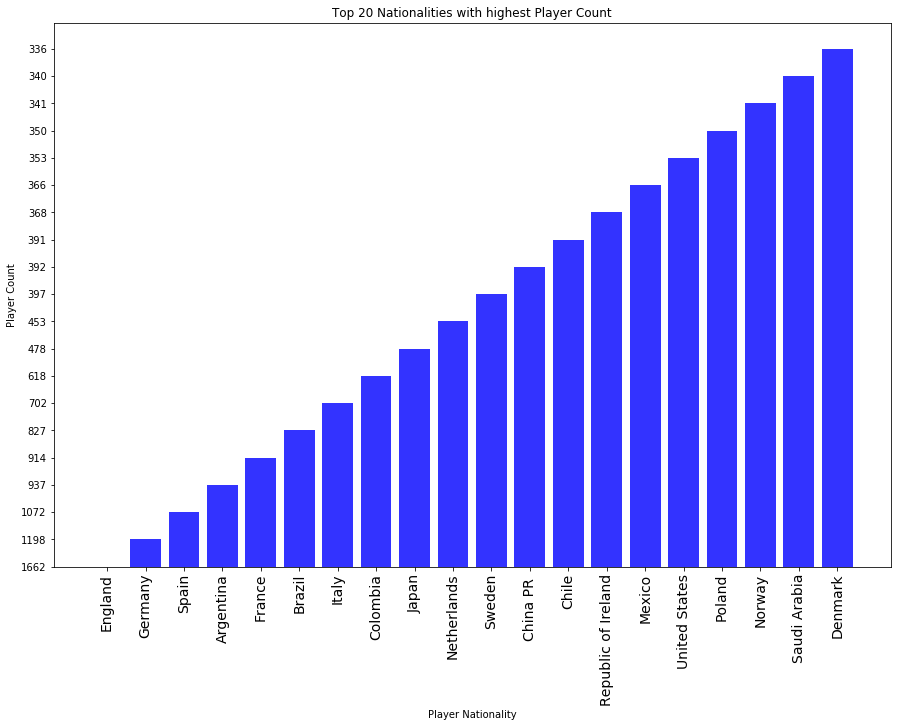

In [63]:
# Create bar chart for nationalities with highest player count
player_nationality=new_player_nationality["Nationality"]
player_count = new_player_nationality["Player Count"]
x_axis = np.arange(len(player_nationality))
plt.figure(figsize=(15,10))
plt.bar(x_axis,player_count, color='b', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, player_nationality, rotation="vertical", fontsize=14)
plt.title("Top 20 Nationalities with highest Player Count")
plt.xlabel("Player Nationality")
plt.ylabel("Player Count")
plt.savefig("PlayerNationalityCount.png")

In [64]:
#Find out how many players a particular nationality has
#Find  USA players there are in our dataset

usa_players = new_df.loc[(new_df.Nationality=="United States")]
usa_players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age Range
570,570,227796,C. Pulisic,19,https://cdn.sofifa.org/players/4/19/227796.png,United States,https://cdn.sofifa.org/flags/95.png,79,87,Borussia Dortmund,...,67.0,38.0,30.0,41.0,8.0,12.0,13.0,16.0,14.0,<20
619,619,204082,J. Brooks,25,https://cdn.sofifa.org/players/4/19/204082.png,United States,https://cdn.sofifa.org/flags/95.png,79,84,VfL Wolfsburg,...,81.0,79.0,81.0,76.0,8.0,7.0,10.0,9.0,10.0,21-25
900,900,177159,F. Johnson,30,https://cdn.sofifa.org/players/4/19/177159.png,United States,https://cdn.sofifa.org/flags/95.png,77,77,Borussia Mönchengladbach,...,70.0,62.0,75.0,73.0,7.0,7.0,10.0,12.0,15.0,26-30
984,984,202316,T. Chandler,28,https://cdn.sofifa.org/players/4/19/202316.png,United States,https://cdn.sofifa.org/flags/95.png,77,77,Eintracht Frankfurt,...,71.0,74.0,79.0,79.0,12.0,7.0,8.0,11.0,12.0,26-30
1373,1373,176237,J. Altidore,28,https://cdn.sofifa.org/players/4/19/176237.png,United States,https://cdn.sofifa.org/flags/95.png,76,76,Toronto FC,...,70.0,15.0,34.0,27.0,16.0,9.0,14.0,12.0,12.0,26-30


# Parul

In [11]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = ["<20", "21-25","26-30","31-35","36-40",">40"]

In [12]:
#creating a new df
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

,ID,Name,Age,Age Range,Wage,Value
0,158023,L. Messi,31,31-35,565000,€110.5M
1,20801,Cristiano Ronaldo,33,31-35,405000,€77M
2,190871,Neymar Jr,26,26-30,290000,€118.5M
3,193080,De Gea,27,26-30,260000,€72M
4,192985,K. De Bruyne,27,26-30,355000,€102M


In [13]:
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())

age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
age_analysis_df

,ID,Name,Age,Wage,Value,Total Wage
Age Range,,,,,,
<20,3304,3304,3304,3304,3304,11006000
21-25,6666,6666,6666,6666,6666,59129000
26-30,5412,5412,5412,5412,5412,74777000
31-35,2247,2247,2247,2247,2247,30427000
36-40,281,281,281,281,281,1737000
>40,8,8,8,8,8,21000


In [14]:
age_analysis_df['Total Wage'].max()

74777000

In [15]:
age_analysis_df['Total Wage'].min()

21000

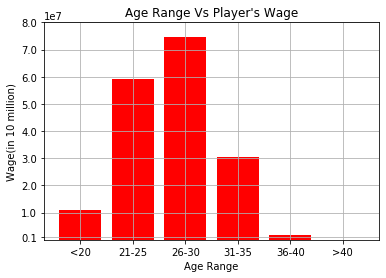

In [16]:
# Age Range analysis
Age_player=age_analysis_df.index
Player_wage=age_analysis_df['Total Wage']
x_axis=np.arange(len(Age_player))
plt.bar(x_axis, Player_wage, color=('red'),  align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Age_player)
plt.yticks([1000000,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000])
#plt.grid(axis='y')
plt.grid()

plt.title("Age Range Vs Player's Wage")
plt.ylabel('Wage(in 10 million)')
plt.xlabel('Age Range')
plt.savefig('Wage.png')

In [17]:
# Country/ nationality Analysis

country_analysis_df = pd.DataFrame(new_df.groupby(['Nationality'])[['ID']].count()).reset_index()
country_analysis_df.head()

,Nationality,ID
0,Afghanistan,4
1,Albania,39
2,Algeria,60
3,Andorra,1
4,Angola,15


In [98]:
#Converting 'Players count - grouped(ID)' to integer
country_analysis_df['Players_count'] = country_analysis_df['ID'].astype(int)
country_analysis_df['Players_countFew'] = country_analysis_df['ID'].astype(int)

In [99]:
country_analysis_df['Players_count'] = country_analysis_df['Players_count'].apply(lambda x: x if x > 100 else 0)
country_analysis_df = country_analysis_df[country_analysis_df.Players_count != 0]
country_analysis_df.head()

,Nationality,ID,Players_count,Latitude,Longitude,Players_countFew
6,Argentina,935,935,-38.416097,-63.616672,935
8,Australia,234,234,-25.274398,133.775136,234
9,Austria,296,296,47.516231,14.550072,296
13,Belgium,259,259,50.503887,4.469936,259
20,Brazil,825,825,-14.235004,-51.925280,825


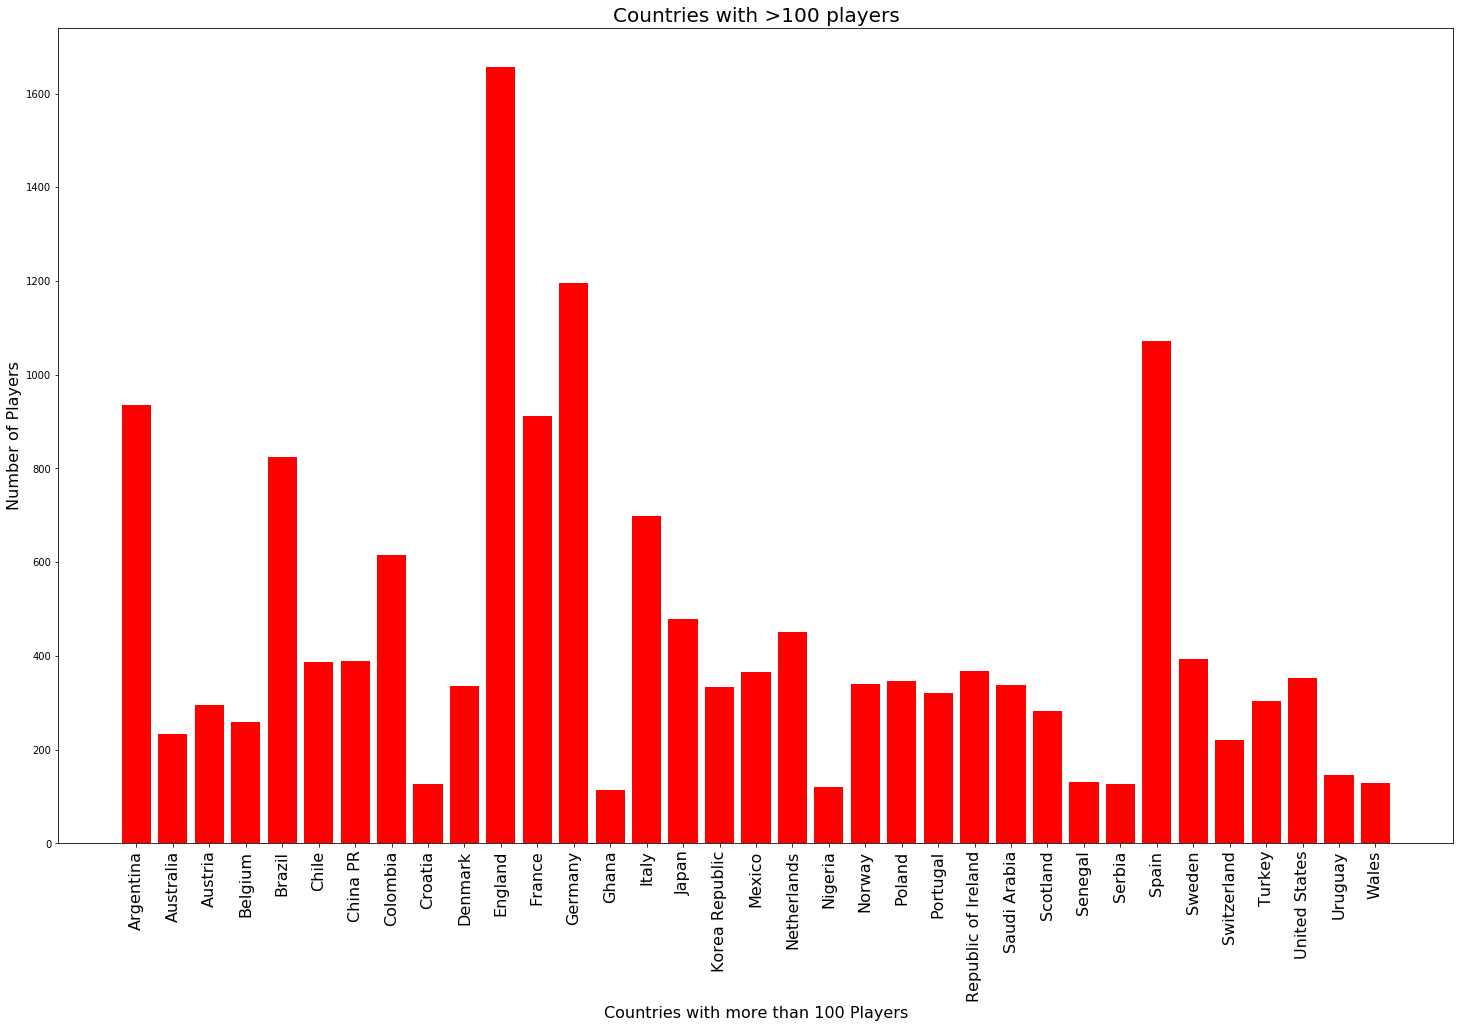

In [22]:
# Set x axis and tick locations
x_axis = np.arange(len(country_analysis_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,15))
plt.bar(x_axis, country_analysis_df["Players_count"], color='r', align="edge")
plt.xticks(tick_locations, country_analysis_df["Nationality"], rotation="vertical",fontsize=16)
plt.title("Countries with >100 players",fontsize=20)
plt.ylabel('Number of Players',fontsize=16)
plt.xlabel('Countries with more than 100 Players',fontsize=16)
plt.savefig('Countries.png')

In [23]:
# Make Google API call reuqest and store the coordinates of each country

def getLatLng(country): 
    # Target country
    target_country = country

    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
                  'address={0}&key={1}').format(target_country, gkey)
    
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()

    # Extract latitude and longitude
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    return lat,lng; 

In [26]:
# Add Latitude and Logitude columns to the DF

for i, row in country_analysis_df.iterrows():
    lat, lng = getLatLng(row['Nationality'])
    #print(row['Nationality'], lat, lng)
    country_analysis_df.at[i, 'Latitude'] = lat
    country_analysis_df.at[i, 'Longitude'] = lng
country_analysis_df.head()   

,Nationality,ID,Players_count,Latitude,Longitude
6,Argentina,935,935,-38.416097,-63.616672
8,Australia,234,234,-25.274398,133.775136
9,Austria,296,296,47.516231,14.550072
13,Belgium,259,259,50.503887,4.469936
20,Brazil,825,825,-14.235004,-51.925280


In [27]:
# Create a GMap

subset = country_analysis_df[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.values]

In [28]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to a variable
markers = gmaps.marker_layer(tuples)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

# Selvi

In [29]:
sorted_overall=new_df.sort_values('Overall', ascending=False )
sorted_potential=new_df.sort_values('Potential', ascending=False)
sorted_age=new_df.sort_values('Age', ascending=False,)
sorted_overall.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age Range
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,31-35
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,31-35
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,26-30
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,26-30
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,26-30


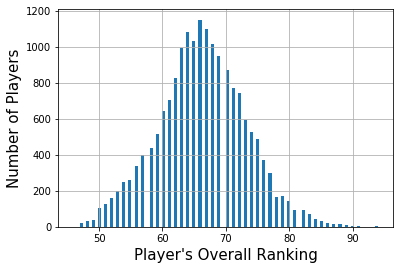

In [30]:
#histogram number of players and their overall ranking
sorted_overall['Overall'].hist(bins=100)
plt.xlabel("Player's Overall Ranking", fontsize=15)
plt.ylabel("Number of Players",fontsize=15)
plt.savefig('overall_ranking.png')

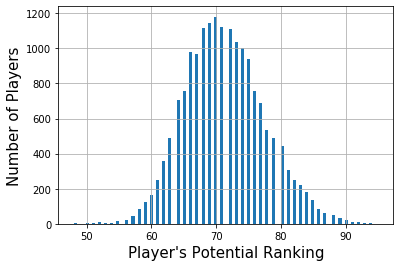

In [31]:
#histogram number of players and their potential ranking
sorted_potential['Potential'].hist(bins=100)
plt.xlabel("Player's Potential Ranking", fontsize=15)
plt.ylabel("Number of Players",fontsize=15)
plt.savefig('potential_ranking.png')

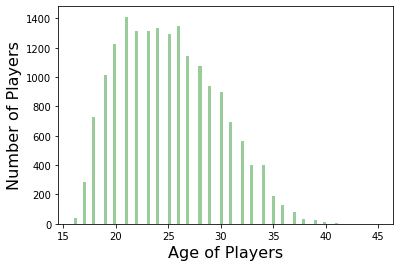

In [32]:
#Age distribution of the players
sns.distplot(sorted_age['Age'], kde=False, color='green', bins=100)
#plt.title("Player's Age", fontsize=18)
plt.xlabel('Age of Players', fontsize=16)
plt.ylabel('Number of Players', fontsize=16)
plt.savefig('age_distribution.png')

In [33]:
#creating a dictionary & new df to hold Megan and Messi's statistics
player_stat_data={'Name':['Megan', 'Messi'],
             'Matches_Played':[5,4],
             'Goals_Scored':[6,1],
             'Penalties_Scored':[3,0],
             'Assists': [3,2],
             'Corners':[16,2],
             'Shots_Blocked':[3,8],
             'Fouls_Commited':[4,4]}
player_stat2={'Name':['Megan', 'Messi'],
              'Minutes_Played':[428,360],
              'Distance_Coveredkm':[42.3, 31.6]}
player_info={'Name':['Megan', 'Messi'],
             'Age':[34,32],
             'Height':[167,170],
             'International_Captains':[158,136],
             'International_Goals':[50,65]}
player_salary={'Name':['Megan', 'Messi'],
              'Salary($)':[400000,44000000]}

In [35]:
player_stat_df = pd.DataFrame(player_stat_data) 
player_stat2=pd.DataFrame(player_stat2)
player_info_df=pd.DataFrame(player_info)
player_salary_df=pd.DataFrame(player_salary)
player_stat_df

,Name,Matches_Played,Goals_Scored,Penalties_Scored,Assists,Corners,Shots_Blocked,Fouls_Commited
0,Megan,5,6,3,3,16,3,4
1,Messi,4,1,0,2,2,8,4


In [36]:
#pivoting the table to make it easy to plot
pivot_stat_df = player_stat_df.pivot_table(columns='Name')
pivot_stat2 = player_stat2.pivot_table(columns='Name')
pivot_info_df = player_info_df.pivot_table(columns='Name')
pivot_salary_df = player_salary_df.pivot_table(columns='Name')
pivot_stat_df

Name,Megan,Messi
Assists,3,2
Corners,16,2
Fouls_Commited,4,4
Goals_Scored,6,1
Matches_Played,5,4
Penalties_Scored,3,0
Shots_Blocked,3,8


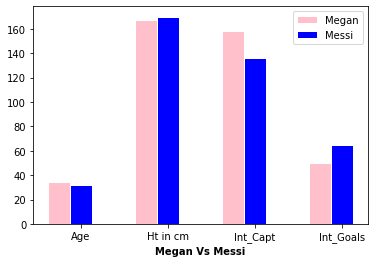

In [37]:
#barplot1 - Megan vs Messi based on physical stats
barWidth = 0.25
bars1=pivot_info_df['Megan']
bars2=pivot_info_df['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.xlabel('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Age','Ht in cm','Int_Capt','Int_Goals'])

plt.legend()
plt.savefig('Megan_Messi.png')
plt.show()


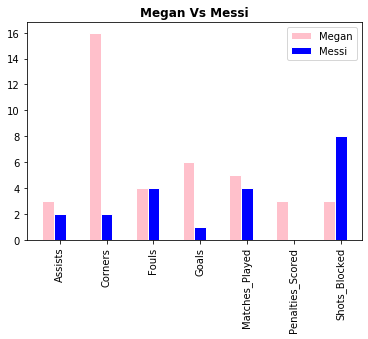

In [38]:
#barplot - Megan vs Messi achievements
barWidth = 0.25
bars1=pivot_stat_df['Megan']
bars2=pivot_stat_df['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Assists','Corners','Fouls', 'Goals', 'Matches_Played', 'Penalties_Scored', 'Shots_Blocked'], rotation='vertical')

plt.legend()
plt.savefig('Megan_Messi2.png')
plt.show()


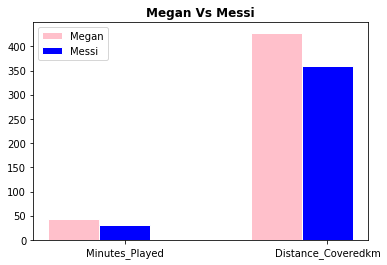

In [39]:
#barplot 3 - Megan vs Messi game 
barWidth = 0.25
bars1=pivot_stat2['Megan']
bars2=pivot_stat2['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Minutes_Played', 'Distance_Coveredkm'])
plt.legend()
plt.savefig('Megan_Messi3.png')
plt.show()

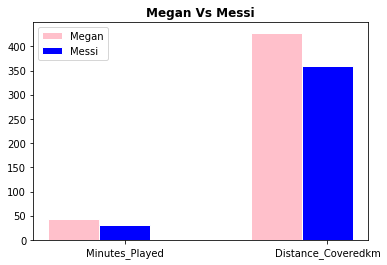

In [40]:
#barplot 3
barWidth = 0.25
bars1=pivot_stat2['Megan']
bars2=pivot_stat2['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Minutes_Played', 'Distance_Coveredkm'])

plt.legend()
plt.savefig('Megan_Messi3.png')
plt.show()


In [41]:
# Creating a team of top 11 players

top11_overall=sorted_overall.iloc[0:11]

In [43]:
#taking top 11 players based on overall ranking and creating a list of 11 skills of those players
skill_df=top11_overall.loc[ :,'Crossing':'SprintSpeed']
skill_df['Name']=top11_overall.loc[ :, 'Name']
col_name=skill_df.columns
crossing=list(skill_df.Crossing.values)
finishing=list(skill_df.Finishing.values)
heading_accuracy=list(skill_df.HeadingAccuracy.values)
shortpassing=list(skill_df.ShortPassing.values)
volleys=list(skill_df.Volleys.values)
curve=list(skill_df.Curve.values)
fkaccuracy=list(skill_df.FKAccuracy.values)
longpassing=list(skill_df.LongPassing.values)
ballcontrol=list(skill_df.BallControl.values)
acceleration=list(skill_df.Acceleration.values)
sprintspeed=list(skill_df.SprintSpeed.values)

In [44]:
player_name=list(skill_df.Name.values)
player_name

['L. Messi',
 'Cristiano Ronaldo',
 'Neymar Jr',
 'De Gea',
 'K. De Bruyne',
 'E. Hazard',
 'L. Modrić',
 'L. Suárez',
 'Sergio Ramos',
 'D. Godín',
 'David Silva']

In [45]:
skill_stats=np.array([crossing,finishing,heading_accuracy, shortpassing,volleys, curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed])            
skill_stats

array([[84., 84., 79., 17., 93., 81., 86., 77., 66., 55., 84.],
       [95., 94., 87., 13., 82., 84., 72., 93., 60., 42., 76.],
       [70., 89., 62., 21., 55., 61., 55., 77., 91., 92., 54.],
       [90., 81., 84., 50., 92., 89., 93., 82., 78., 79., 93.],
       [86., 87., 84., 13., 82., 80., 76., 88., 66., 47., 82.],
       [93., 81., 88., 21., 85., 83., 85., 86., 74., 49., 82.],
       [94., 76., 87., 19., 83., 79., 78., 84., 72., 51., 77.],
       [87., 77., 78., 51., 91., 83., 88., 64., 77., 70., 87.],
       [96., 94., 95., 42., 91., 94., 93., 90., 84., 76., 94.],
       [91., 89., 94., 57., 78., 94., 80., 86., 76., 68., 70.],
       [86., 91., 90., 58., 76., 88., 72., 75., 75., 68., 64.]])

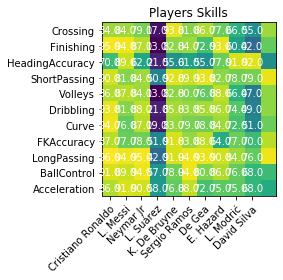

In [96]:
#heat map
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(skill_stats, annot=True, linewidths=.5)

fig, ax = plt.subplots()
im = ax.imshow(skill_stats)

# We want to show all ticks...
ax.set_xticks(np.arange(len(player_name)))
ax.set_yticks(np.arange(len(skill_stats)))
# ... and label them with the respective list entries
ax.set_xticklabels(player_name)
ax.set_yticklabels(col_name)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(skill_stats)):
    for j in range(len(player_name)):
        text = ax.text(j, i, skill_stats[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Players Skills")
fig.tight_layout()
plt.savefig('skills.png')
plt.show()


# Reza

In [66]:
leftright_pd = data_df[["Preferred Foot","Dribbling", "BallControl"]]
left_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]== "Left", :]
right_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]=="Right", :]

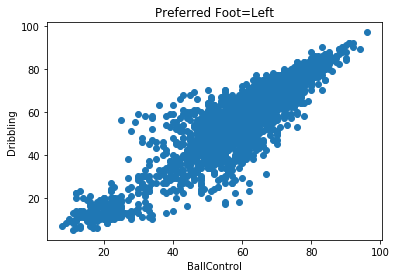

<Figure size 432x288 with 0 Axes>

In [67]:
# Scatter plot shows the direct relation between dribbling and Ball Control - Left foot players
plt.scatter(left_pd["BallControl"], left_pd["Dribbling"], marker="o" )
plt.title("Preferred Foot=Left")
plt.xlabel("BallControl")
plt.ylabel("Dribbling")
# Prints the scatter plot to the screen
plt.show()
plt.savefig("Left_foot.png")

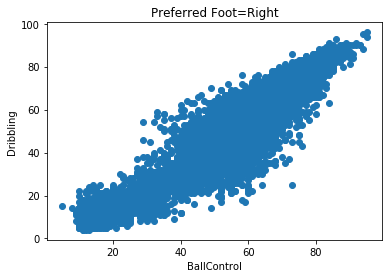

<Figure size 432x288 with 0 Axes>

In [69]:
# Scatter plot shows the direct relation between dribbling and Ball Control - Right foot players
plt.scatter(right_pd["BallControl"], right_pd["Dribbling"], marker="o")
plt.title("Preferred Foot=Right")
plt.xlabel("BallControl")
plt.ylabel("Dribbling")
# Prints the scatter plot to the screen
plt.show()
plt.savefig("Right_foot.png")